Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [73]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [3]:
# If you are using the data by mounting the google drive, use the following :
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/cancer/'

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [90]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(f'{root_path}/Train')
data_dir_test = pathlib.Path(f'{root_path}/Test')
train_path="gdrive/My Drive/Colab Notebooks/cancer/Train/"

In [49]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [50]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [51]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [52]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(180,180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [53]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

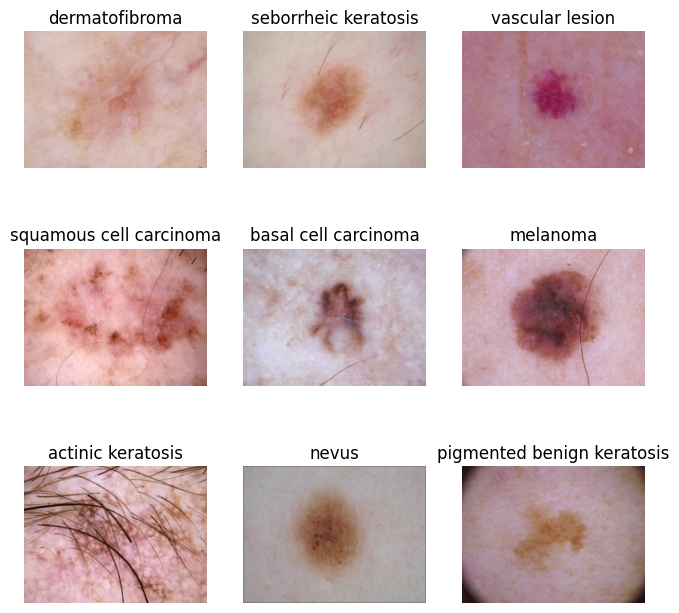

In [54]:
import matplotlib.pyplot as plt
num=0
plt.figure(figsize=(8, 8))
for dirpath, dirnames, filenames in os.walk(str(f'{root_path}/Train')):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [55]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [56]:
### Your code goes here
# define a CNN with 9 ouput classes
num_classes = 9
model = tf.keras.Sequential([
 tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
 tf.keras.layers.Conv2D(32, 3, activation='relu'),
 tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Conv2D(64, 3, activation='relu'),
 tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Conv2D(32, 3, activation='relu'),
 tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(64, activation='relu'),
 tf.keras.layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [57]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [84]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                 

### Train the model

In [59]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 19s 84ms/step - loss: 2.0127 - accuracy: 0.2433 - val_loss: 1.8909 - val_accuracy: 0.2953
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 1.7565 - accuracy: 0.3834 - val_loss: 1.6373 - val_accuracy: 0.4564
Epoch 3/20
56/56 [==============================] - 2s 30ms/step - loss: 1.6006 - accuracy: 0.4392 - val_loss: 1.4684 - val_accuracy: 0.4676
Epoch 4/20
56/56 [==============================] - 2s 30ms/step - loss: 1.4505 - accuracy: 0.4933 - val_loss: 1.4557 - val_accuracy: 0.4899
Epoch 5/20
56/56 [==============================] - 2s 32ms/step - loss: 1.3634 - accuracy: 0.5279 - val_loss: 1.3466 - val_accuracy: 0.5369
Epoch 6/20
56/56 [==============================] - 2s 31ms/step - loss: 1.3093 - accuracy: 0.5435 - val_loss: 1.3272 - val_accuracy: 0.5481
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.1996 - accuracy: 0.5776 - val_loss: 1.3410 - val_accuracy: 0.5347
Epoch 8/20
5

### Visualizing training results

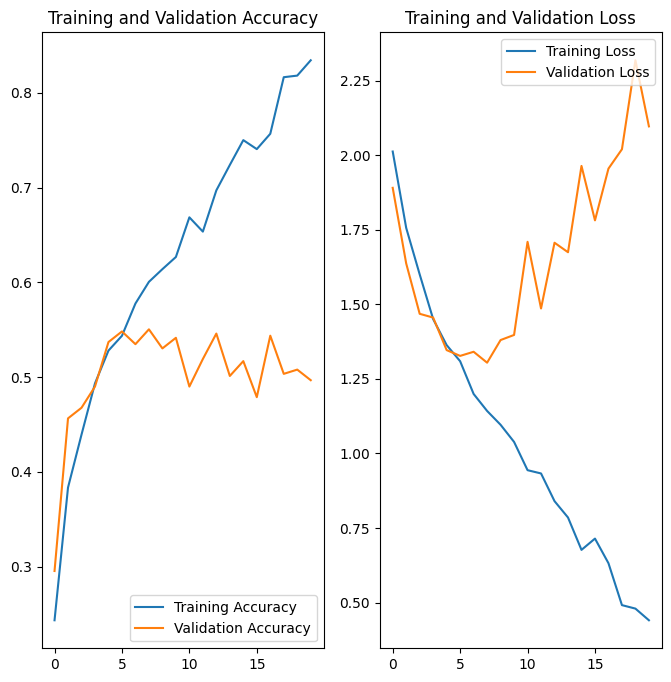

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

Accuracity : 83%  - Training Data Set
Accuracity : 49%  - Validation
Validation Loss:  Very High => Overfitting


First Strategy =>  Add  Dropout layers and remove the BatchNormalization layers.  

### Todo:
### Create the model, compile and train the model


In [63]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9
model = tf.keras.Sequential([
 tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
 tf.keras.layers.Conv2D(32, 3, activation='relu'),
 tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Dropout(0.7),
 tf.keras.layers.Conv2D(64, 3, activation='relu'),
 tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Dropout(0.7),
 tf.keras.layers.Conv2D(32, 3, activation='relu'),
 tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Dropout(0.7),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dropout(0.7),
 tf.keras.layers.Dense(64, activation='relu'),
 tf.keras.layers.Dropout(0.25),
 tf.keras.layers.Dense(num_classes)
])


### Compiling the model

In [64]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

### Training the model

In [65]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 53ms/step - loss: 2.4159 - accuracy: 0.1618 - val_loss: 2.1540 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 3s 48ms/step - loss: 2.0887 - accuracy: 0.1724 - val_loss: 2.1093 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 3s 48ms/step - loss: 2.0761 - accuracy: 0.1897 - val_loss: 2.1038 - val_accuracy: 0.1857
Epoch 4/20
56/56 [==============================] - 3s 49ms/step - loss: 2.0544 - accuracy: 0.1948 - val_loss: 2.0808 - val_accuracy: 0.1924
Epoch 5/20
56/56 [==============================] - 3s 47ms/step - loss: 2.0439 - accuracy: 0.1864 - val_loss: 2.0628 - val_accuracy: 0.1924
Epoch 6/20
56/56 [==============================] - 3s 47ms/step - loss: 2.0342 - accuracy: 0.1975 - val_loss: 2.0497 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 3s 46ms/step - loss: 2.0324 - accuracy: 0.1886 - val_loss: 2.0453 - val_accuracy: 0.1924
Epoch 8/20
56

### Visualizing the results

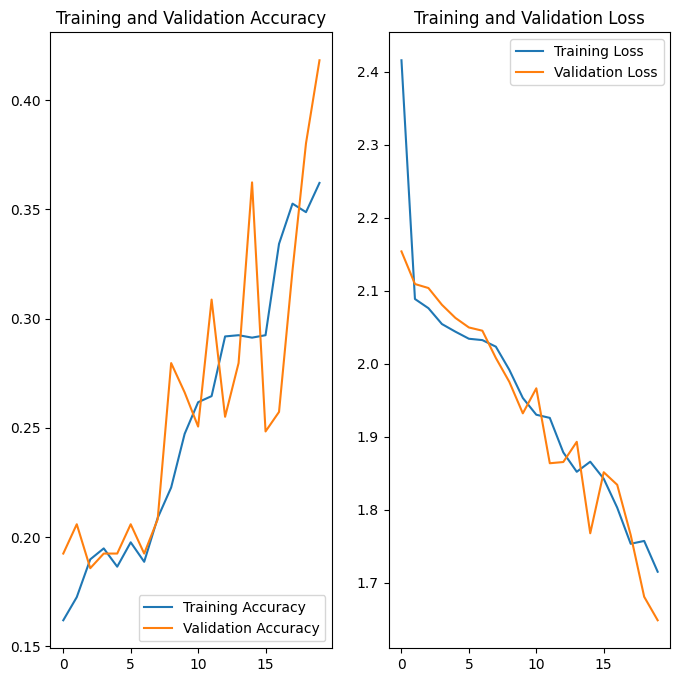

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?



*   **Train Set Acurracy => 43%**
*   **Validate Set Accuracy => 36%**
*   **Validate Loss => Very Low => Underfitting** 






#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [68]:
## Your code goes here.
for i in class_names:
    directory =train_path+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
**R: seborrheic keratosis has 77 samples**
#### - Which classes dominate the data in terms proportionate number of samples?
**R: pigmented benign keratosis has 462 samples**


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [69]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [70]:
path_to_training_dataset= train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/cancer/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6224602320>: 100%|██████████| 500/500 [00:28<00:00, 17.82 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/cancer/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6214418820>: 100%|██████████| 500/500 [00:20<00:00, 24.95 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/cancer/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F62248173A0>: 100%|██████████| 500/500 [00:20<00:00, 23.96 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/cancer/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F6224BC5120>: 100%|██████████| 500/500 [01:50<00:00,  4.54 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/cancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F6224C94880>: 100%|██████████| 500/500 [01:34<00:00,  5.27 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/cancer/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6224E4DFC0>: 100%|██████████| 500/500 [00:20<00:00, 24.54 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/cancer/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F6224BC7160>: 100%|██████████| 500/500 [00:48<00:00, 10.40 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/cancer/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F62143AAAD0>: 100%|██████████| 500/500 [00:21<00:00, 23.68 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/cancer/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F62A298F790>: 100%|██████████| 500/500 [00:21<00:00, 23.36 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [76]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)


4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [81]:
## Your code goes here.
for i in class_names:
    directory =train_path+i+'/'
    output_directory = train_path+i+'/output'
    class_directory = pathlib.Path(directory)
    output_class_directory = pathlib.Path(output_directory)
    length=len(list(class_directory.glob('*.jpg'))) + len(list(output_class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [91]:
data_dir_train=train_path

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset='training',
  image_size=(180, 180),
  batch_size=batch_size
  )


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [93]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [94]:
## your code goes here
num_classes = 9
model = tf.keras.Sequential([
 tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
 tf.keras.layers.Conv2D(32, 3, activation='relu'),
 tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Conv2D(64, 3, activation='relu'),
 tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Conv2D(32, 3, activation='relu'),
 tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(64, activation='relu'),
 tf.keras.layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [95]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [96]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 40s 219ms/step - loss: 1.9185 - accuracy: 0.2455 - val_loss: 1.7751 - val_accuracy: 0.3148
Epoch 2/50
169/169 [==============================] - 34s 196ms/step - loss: 1.5661 - accuracy: 0.3934 - val_loss: 1.4596 - val_accuracy: 0.4291
Epoch 3/50
169/169 [==============================] - 37s 213ms/step - loss: 1.3893 - accuracy: 0.4631 - val_loss: 1.4182 - val_accuracy: 0.4506
Epoch 4/50
169/169 [==============================] - 34s 197ms/step - loss: 1.2486 - accuracy: 0.5210 - val_loss: 1.2429 - val_accuracy: 0.5301
Epoch 5/50
169/169 [==============================] - 39s 224ms/step - loss: 1.1200 - accuracy: 0.5831 - val_loss: 1.3090 - val_accuracy: 0.5100
Epoch 6/50
169/169 [==============================] - 34s 195ms/step - loss: 0.9686 - accuracy: 0.6435 - val_loss: 1.2700 - val_accuracy: 0.5486
Epoch 7/50
169/169 [==============================] - 34s 197ms/step - loss: 0.8580 - accuracy: 0.6810 - val_loss: 1.0870 - val_ac

#### **Todo:**  Visualize the model results

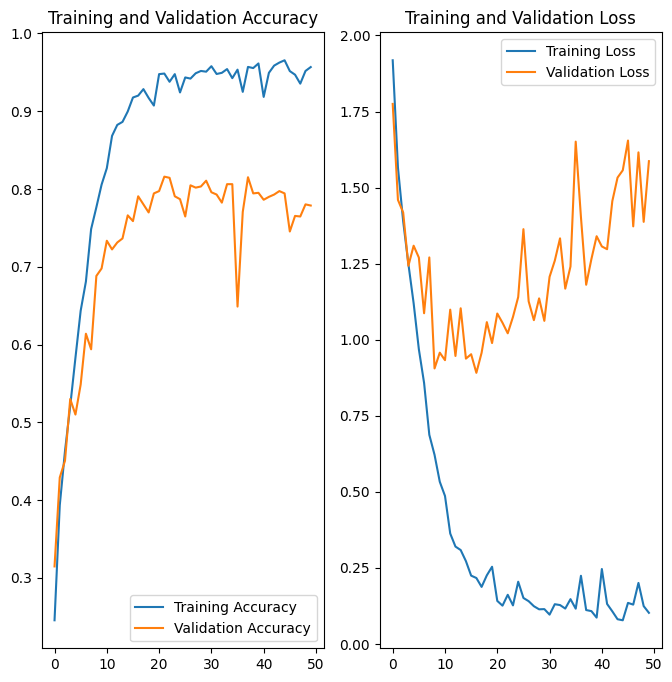

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



* The training accuracy =>  ~95%.
* The validation accuracy => ~80%.
* Model accuracy has improved
* Rebalance has helped treat the overfitting.
* Models Better => More Epochs 